# 1. Environment Setup
In this project, we use YOLOv8 as implemented in ultralytics library.

In [1]:
!nvidia-smi

Tue Sep 17 11:02:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.8/872.8 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8


In [5]:
!pip install ultralytics --upgrade

In [6]:
# Libraries import
import ultralytics
import torch
import cv2


# 2. Dataset preparation

In [ ]:
# Download the dataset

from roboflow import Roboflow
rf = Roboflow(api_key="nDl6S3b0VZgE2D0dVABB")
project = rf.workspace("vietnam-traffic-sign-detection").project("vietnam-traffic-sign-detection-2i2j8")
version = project.version(6)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.95, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Vietnam-Traffic-Sign-Detection-6 in yolov8:: 100%|██████████| 7372/7372 [00:01<00:00, 4940.87it/s]


In [7]:
# Or load from drive

import shutil
shutil.copytree('/content/drive/MyDrive/YOLOv9-AdversarialAttack/YOLOv8/datasets', '/content/datasets')

'/content/datasets'

# 3. Training with Vietnam Traffic Sign Detection
This dataset was taken from roboflow, including 3680 images. It is separated as 2280 training images, 786 valid images, and 614 testing images

In [ ]:
# training medium version of YOLOv8

from ultralytics.models.yolo.detect.train import DetectionTrainer
from ultralytics import YOLO

args = dict(model="yolov8m.pt", data="/content/datasets/data.yaml", epochs=100, batch=33)
trainer = DetectionTrainer(overrides=args)
trainer.train()

Ultralytics YOLOv8.2.92 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/data.yaml, epochs=100, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

100%|██████████| 755k/755k [00:00<00:00, 105MB/s]


TensorBoard: Start with 'tensorboard --logdir runs/detect/train2', view at http://localhost:6006/


100%|██████████| 49.7M/49.7M [00:00<00:00, 439MB/s]


Overriding model.yaml nc=80 with nc=58

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

100%|██████████| 6.25M/6.25M [00:00<00:00, 342MB/s]


AMP: checks passed ✅
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA L4) 22.17G total, 0.27G reserved, 0.24G allocated, 21.66G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    25889902       79.25         0.682         38.27         98.98        (1, 3, 640, 640)                    list
    25889902       158.5         1.019         27.41         36.14        (2, 3, 640, 640)                    list
    25889902         317         1.827         27.58         36.53        (4, 3, 640, 640)                    list
    25889902         634         3.269         39.13         57.06        (8, 3, 640, 640)                    list
    25889902        1268         6.409         91.59         110.8       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 33 for CUDA:0 13.39G/22.17G (60%) ✅


train: Scanning /content/datasets/train/labels... 2280 images, 465 backgrounds, 0 corrupt: 100%|██████████| 2280/2280 [00:01<00:00, 1430.06it/s]


train: New cache created: /content/datasets/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/datasets/valid/labels... 786 images, 169 backgrounds, 0 corrupt: 100%|██████████| 786/786 [00:00<00:00, 1225.75it/s]

val: New cache created: /content/datasets/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000161, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.000515625), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      14.2G     0.8293      4.291       1.04          1        640: 100%|██████████| 70/70 [00:48<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.37it/s]


                   all        786       1251      0.684      0.198      0.172      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      14.1G      0.712      1.847     0.9659          4        640: 100%|██████████| 70/70 [00:47<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.61it/s]

                   all        786       1251      0.687      0.341      0.381      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      14.1G     0.7042      1.375     0.9719          9        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.61it/s]

                   all        786       1251      0.609      0.499      0.519      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      14.2G     0.7117      1.158     0.9914          2        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]

                   all        786       1251      0.714      0.469      0.569      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      14.1G     0.6873     0.9493     0.9712          6        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]

                   all        786       1251      0.606      0.632      0.686      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      14.2G     0.6886     0.8591     0.9636          4        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]

                   all        786       1251      0.719      0.631      0.705      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      14.2G     0.6873     0.7932     0.9724         10        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]

                   all        786       1251      0.788      0.613      0.723      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      14.2G     0.6716     0.7464     0.9534         21        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.61it/s]

                   all        786       1251      0.701      0.721       0.76      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      14.2G     0.6587     0.6673     0.9491          6        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]

                   all        786       1251      0.795      0.658      0.762      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      14.1G     0.6416     0.6717       0.96          8        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]

                   all        786       1251      0.762      0.704      0.778      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      14.1G     0.6485     0.6353     0.9604         11        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.61it/s]

                   all        786       1251       0.74      0.764      0.792      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      14.1G     0.6421     0.6155     0.9409         14        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]

                   all        786       1251      0.818      0.727      0.821       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      14.2G     0.6526     0.5973     0.9757          1        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]

                   all        786       1251      0.793      0.758      0.839      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      14.2G     0.6254     0.5618     0.9479         10        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.61it/s]

                   all        786       1251      0.785      0.745      0.814      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      14.2G     0.6143     0.5537     0.9379          4        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]

                   all        786       1251      0.798      0.743      0.805      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      14.1G     0.6242     0.5487     0.9462          4        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]

                   all        786       1251      0.813      0.787      0.836      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      14.1G     0.6276     0.5415     0.9369         15        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]

                   all        786       1251      0.802      0.804      0.851      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      14.1G     0.6196     0.5239      0.933         10        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]

                   all        786       1251      0.803      0.794      0.862      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      14.1G     0.6276     0.5133     0.9425          6        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]

                   all        786       1251      0.723      0.816      0.838      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      14.1G     0.5986     0.5009     0.9343          4        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]

                   all        786       1251      0.757      0.837      0.861      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      14.1G     0.5893     0.4905     0.9095          6        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]

                   all        786       1251      0.808       0.82      0.868       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      14.1G     0.6105     0.4909     0.9398          2        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]

                   all        786       1251      0.774      0.813      0.859      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      14.1G     0.5922     0.4979     0.9222          4        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]

                   all        786       1251        0.8      0.843      0.863      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      14.1G      0.588     0.4617     0.9188          6        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.66it/s]

                   all        786       1251      0.758      0.864       0.85      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      14.2G     0.5864     0.4565     0.9202          8        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]

                   all        786       1251      0.795      0.817      0.841      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      14.1G     0.5974      0.469     0.9241          7        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]

                   all        786       1251      0.807      0.814      0.862      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      14.2G     0.5792     0.4487     0.9136          8        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]

                   all        786       1251      0.774      0.833      0.862       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      14.1G      0.565     0.4498     0.9186          8        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]

                   all        786       1251      0.782       0.83      0.859      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      14.1G     0.5689     0.4442     0.9191         12        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]

                   all        786       1251      0.828      0.825      0.869      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      14.1G     0.5934     0.4466     0.9194          9        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]

                   all        786       1251      0.824      0.836      0.863      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      14.1G     0.5665     0.4209     0.9125          7        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]

                   all        786       1251      0.753      0.869      0.881      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      14.2G     0.5512     0.4105     0.9018          9        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]

                   all        786       1251      0.826      0.812      0.849      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      14.1G     0.5674     0.4123     0.9133         10        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]

                   all        786       1251      0.829      0.847      0.869       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      14.2G       0.57     0.4244     0.9212          4        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]

                   all        786       1251      0.782      0.847       0.87      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      14.1G     0.5598      0.407     0.9115         18        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]

                   all        786       1251      0.804      0.843      0.861      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      14.1G     0.5557     0.3973     0.9113         13        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]

                   all        786       1251       0.83      0.824      0.863       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      14.1G     0.5511     0.4114     0.9111          3        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]

                   all        786       1251      0.815      0.839      0.865      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      14.2G     0.5538     0.3962     0.9077         11        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]

                   all        786       1251      0.816       0.83      0.872      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      14.1G     0.5379      0.392     0.9065         11        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]

                   all        786       1251      0.842      0.836      0.877      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      14.1G     0.5379     0.4003     0.9102          5        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.59it/s]

                   all        786       1251      0.835      0.825      0.888      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      14.1G     0.5344     0.3796     0.8985          3        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.58it/s]

                   all        786       1251      0.848      0.822       0.87      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      14.1G      0.541     0.3988     0.9072          6        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]

                   all        786       1251      0.806      0.846       0.88      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      14.1G     0.5329     0.3786     0.9036         13        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]

                   all        786       1251      0.789      0.879      0.872      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      14.1G     0.5355     0.3889     0.9064          9        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]

                   all        786       1251      0.766      0.886      0.883      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      14.1G     0.5298      0.367     0.9004          4        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]

                   all        786       1251      0.776      0.877      0.885      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      14.1G     0.5198     0.3714     0.8979          4        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.61it/s]

                   all        786       1251      0.817      0.852      0.864      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      14.2G     0.5106     0.3622     0.8889         11        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.60it/s]

                   all        786       1251      0.855      0.804      0.871      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      14.1G     0.5156     0.3737     0.9008          6        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]

                   all        786       1251       0.79      0.867      0.877      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      14.1G     0.5218      0.365      0.891         14        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.60it/s]

                   all        786       1251      0.807      0.844      0.885       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      14.1G     0.5128     0.3485      0.893         10        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]

                   all        786       1251      0.832      0.835      0.878      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      14.2G     0.5136     0.3557     0.8976         11        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.60it/s]

                   all        786       1251      0.809      0.855      0.884      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      14.2G     0.4948     0.3437     0.8862          8        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.61it/s]

                   all        786       1251      0.818      0.859      0.884      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      14.1G     0.5074     0.3525     0.8878          6        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]

                   all        786       1251      0.852      0.824      0.887      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      14.1G     0.5057     0.3465     0.8824          5        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]

                   all        786       1251       0.85      0.817      0.885      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      14.1G     0.5112     0.3524     0.8879          7        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.60it/s]

                   all        786       1251      0.827      0.827      0.882      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      14.1G     0.4744     0.3203     0.8789          3        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.60it/s]

                   all        786       1251      0.806      0.842      0.887      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      14.1G     0.4998     0.3597     0.8861          2        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]

                   all        786       1251      0.742      0.882      0.875      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      14.1G     0.4808     0.3304     0.8741          1        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.61it/s]

                   all        786       1251      0.828      0.848      0.865      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      14.1G     0.4763     0.3235     0.8789          3        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.60it/s]

                   all        786       1251      0.821      0.873      0.891      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      14.2G     0.4858     0.3283     0.8817          7        640: 100%|██████████| 70/70 [00:46<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.61it/s]

                   all        786       1251      0.787      0.882      0.881      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      14.1G     0.4793     0.3224     0.8717          8        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.60it/s]

                   all        786       1251      0.825      0.859      0.889      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      14.1G     0.4724     0.3204     0.8779          7        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]

                   all        786       1251      0.818       0.88      0.898      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      14.1G     0.4758     0.3159     0.8683          4        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]

                   all        786       1251      0.827      0.864      0.874      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      14.1G     0.4622     0.3206     0.8692          2        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]

                   all        786       1251      0.783      0.891      0.879       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      14.1G     0.4624     0.3047     0.8744          2        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]

                   all        786       1251      0.812       0.87      0.886      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      14.1G     0.4534     0.3065     0.8683          5        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]

                   all        786       1251      0.831      0.862       0.87      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      14.1G     0.4587     0.3063     0.8697         10        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]

                   all        786       1251      0.824      0.854      0.892      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      14.2G      0.461     0.2957     0.8703         11        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.66it/s]

                   all        786       1251      0.762      0.899       0.87      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      14.1G     0.4581     0.3107     0.8738          5        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]

                   all        786       1251      0.809      0.854      0.881      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      14.1G     0.4502     0.2936     0.8644          5        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]

                   all        786       1251      0.843      0.834      0.879      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      14.1G     0.4455     0.2967     0.8613          3        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]

                   all        786       1251      0.775      0.892       0.88      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      14.2G     0.4596     0.2962     0.8648          7        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.61it/s]

                   all        786       1251      0.835      0.838      0.888      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      14.1G     0.4496     0.2908     0.8643          5        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]

                   all        786       1251      0.773      0.889      0.874      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      14.1G     0.4583     0.2993     0.8703          2        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]

                   all        786       1251      0.827      0.844      0.875      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      14.2G     0.4503     0.2912     0.8618         12        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]

                   all        786       1251      0.811      0.866      0.885      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      14.1G     0.4459     0.2886     0.8672          1        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]

                   all        786       1251      0.767      0.897      0.881      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      14.1G     0.4389      0.282     0.8581          7        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]

                   all        786       1251      0.852      0.827      0.877      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      14.1G     0.4386     0.2826     0.8642          2        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]

                   all        786       1251      0.841      0.849      0.886      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      14.1G     0.4372     0.2806     0.8606          8        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.60it/s]

                   all        786       1251      0.792      0.885       0.88      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      14.1G     0.4274     0.2767     0.8586          8        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]

                   all        786       1251      0.842      0.839      0.874      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      14.1G     0.4259     0.2803     0.8611          7        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]

                   all        786       1251      0.839      0.842      0.874      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      14.1G     0.4183     0.2687     0.8599          9        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.59it/s]

                   all        786       1251      0.837      0.837      0.875      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      14.1G     0.4133     0.2748     0.8522          9        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]

                   all        786       1251      0.807      0.872      0.882      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      14.2G     0.4172     0.2693     0.8563          6        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]

                   all        786       1251      0.816       0.87       0.88      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      14.1G     0.4214     0.2585     0.8569          4        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]

                   all        786       1251      0.813      0.873      0.879      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      14.1G      0.409     0.2714     0.8559          1        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]

                   all        786       1251       0.79      0.876      0.879       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      14.2G     0.4122      0.261     0.8561          4        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]

                   all        786       1251      0.785      0.883      0.892       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      14.1G     0.4104     0.2652     0.8482          6        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]

                   all        786       1251      0.853      0.827       0.89       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      14.1G     0.4173     0.2689     0.8505          9        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]

                   all        786       1251      0.808      0.874      0.891      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      14.1G     0.3966     0.2538     0.8448          8        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]

                   all        786       1251      0.824      0.862       0.89      0.751


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      14.1G     0.3975     0.2278     0.8287          2        640: 100%|██████████| 70/70 [00:47<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]

                   all        786       1251      0.823       0.87      0.891      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      14.1G     0.3886     0.2232     0.8256          8        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]

                   all        786       1251      0.826      0.872      0.891      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      14.1G     0.3842     0.2198     0.8227          3        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.61it/s]

                   all        786       1251      0.822      0.871      0.892      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      14.1G     0.3859     0.2227     0.8289          3        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.59it/s]

                   all        786       1251      0.819      0.874      0.896      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      14.1G     0.3805     0.2164      0.829          5        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.61it/s]

                   all        786       1251      0.816      0.879      0.891      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      14.2G      0.377     0.2099     0.8218          4        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]

                   all        786       1251      0.809      0.879      0.893      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      14.1G     0.3726     0.2151      0.825          7        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.63it/s]

                   all        786       1251      0.812      0.871      0.891       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      14.1G     0.3724     0.2078     0.8253          8        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.65it/s]

                   all        786       1251      0.812      0.877      0.892       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      14.1G     0.3777     0.2136     0.8227         10        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.61it/s]

                   all        786       1251      0.818      0.877      0.892      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      14.1G      0.367     0.2078     0.8217          7        640: 100%|██████████| 70/70 [00:46<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]

                   all        786       1251      0.819      0.876      0.892       0.75



100 epochs completed in 1.541 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 52.1MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.92 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 218 layers, 25,873,342 parameters, 0 gradients, 78.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.44it/s]


                   all        786       1251      0.819      0.874      0.896      0.756
                DP.135          4          4      0.874          1      0.995      0.956
                 P.102         48         50      0.954       0.88      0.904      0.768
                P.103a         10         10      0.864        0.9      0.912       0.74
                P.103b          1          1      0.392          1      0.995      0.995
                P.103c         15         18      0.713          1      0.982      0.851
                 P.104         10         10      0.896      0.862      0.909       0.75
                P.106a         19         19      0.775      0.907      0.953      0.846
                P.106b         15         23      0.843          1      0.986      0.837
                 P.112          4          4      0.906          1      0.995      0.845
                 P.115          3          3      0.846          1      0.995      0.932
                 P.11

In [ ]:
#Save pretrained model to drive
import shutil

path = '/content/drive/MyDrive/YOLOv9-AdversarialAttack/yolov8_official_2')

shutil.copytree('/content/runs', path)

'/content/drive/MyDrive/YOLOv9-AdversarialAttack/yolov8_official_2'

# 4. Models Evaluation and Inference
In this section, we will explore the performance of the models we just have trained.

In [ ]:
# Evaluation of YOLOv8m
from ultralytics import YOLO
# Load the model
model = YOLO("/content/drive/MyDrive/best.pt")

# Run the evaluation
results = model.val(data="/content/datasets/data.yaml", split="test")



Ultralytics YOLOv8.2.95 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,873,342 parameters, 0 gradients, 78.9 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 24.9MB/s]
val: Scanning /content/datasets/test/labels... 614 images, 132 backgrounds, 0 corrupt: 100%|██████████| 614/614 [00:00<00:00, 2212.64it/s]

val: New cache created: /content/datasets/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:19<00:00,  2.00it/s]


                   all        614        968      0.852      0.818      0.883      0.754
                DP.135          2          2       0.89          1      0.995      0.951
                 P.102         49         50      0.925      0.735      0.866      0.701
                P.103a          8          8      0.969      0.875      0.896      0.767
                P.103b          1          1      0.575          1      0.995      0.895
                P.103c         10         13      0.927      0.976      0.984      0.935
                 P.104          5          5      0.852        0.8      0.827      0.705
                P.106a          9          9      0.881      0.823      0.893      0.829
                P.106b          9          9      0.981          1      0.995      0.881
                 P.112          5          5      0.954          1      0.995      0.957
                 P.115          4          4       0.94          1      0.995      0.906
                 P.11

In [ ]:
# Inference

# 5. Adversarial Attack:
In this section, we will perform adversarial attack on the two models we just have trained by using the two techniques: FGSM (Fast Gradient Sign Method) and PGD (Projected Gradient Descent).

In [8]:
from ultralytics import YOLO
from ultralytics.data import build_dataloader
from ultralytics.models.yolo.detect.train import DetectionTrainer

args = dict(model="/content/best-3.pt", data="/content/datasets/data.yaml", epochs=100)
trainer = DetectionTrainer(overrides=args)
trainer.setup_model()
trainer.set_model_attributes()
trainer.model.eval()



Ultralytics YOLOv8.2.95 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/best-3.pt, data=/content/datasets/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

100%|██████████| 755k/755k [00:00<00:00, 39.6MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384

DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
   

In [9]:
#Load images and Load labels
def load_image(img_path):
  img_path = str(img_path)
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
  img = torch.tensor(img).permute(2,0,1) / 255.0  # Normalize and permute dimensions
  return img

def load_label(labels_path):
  labels = torch.tensor([list(map(float, line.split())) for line in open(labels_path)])
  return labels

In [10]:
import torch
from torch.utils.data import Dataset, DataLoader
from pathlib import Path
from ultralytics import YOLO
from ultralytics.utils.loss import v8DetectionLoss
import cv2
import numpy as np
import os

class CustomDataset(Dataset):
    def __init__(self, image_dir, label_dir):
        super().__init__()
        self.image_paths = list(Path(image_dir).glob('*.jpg'))  # Assuming JPG images
        self.label_paths = [Path(label_dir)/f'{p.stem}.txt' for p in self.image_paths]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Load image
        img = load_image(self.image_paths[idx])
        # img_path = str(self.image_paths[idx])
        # img = cv2.imread(img_path)
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        # img = torch.tensor(img).permute(2,0,1) / 255.0  # Normalize and permute dimensions

        # Load labels
        labels = load_label(self.label_paths[idx])
        # label_path = self.label_paths[idx]
        # labels = torch.tensor([list(map(float, line.split())) for line in open(label_path)])

        return img, labels

def convert_yolo_to_batch_format_torch(label_file):
    # Load YOLO format labels
    labels = np.loadtxt(label_file)
    if labels.size == 0:
          return None

    # Initialize lists for batch_idx, cls, and bboxes
    batch_indices = []
    classes = []
    bboxes = []

    if len(labels.shape) >= 2:
      for label in labels:
          #print(label)
          cls, x_center, y_center, width, height = label

          # Set batch index to 0 for all entries
          batch_indices.append(0)

          # Add class ID
          classes.append(int(cls))

          # Convert YOLO bbox to [x_min, y_min, x_max, y_max]
          x_min = x_center - width / 2.0
          y_min = y_center - height / 2.0
          x_max = x_center + width / 2.0
          y_max = y_center + height / 2.0

          # Add bbox
          bboxes.append([x_min, y_min, x_max, y_max])
    elif (len(labels.shape)==1):
          cls, x_center, y_center, width, height = labels

          # Set batch index to 0 for all entries
          batch_indices.append(0)

          # Add class ID
          classes.append(int(cls))

          # Convert YOLO bbox to [x_min, y_min, x_max, y_max]
          x_min = x_center - width / 2.0
          y_min = y_center - height / 2.0
          x_max = x_center + width / 2.0
          y_max = y_center + height / 2.0

          # Add bbox
          bboxes.append([x_min, y_min, x_max, y_max])
    else:
          return None

    # Convert to torch tensors
    batch_indices_tensor = torch.tensor(batch_indices).view(-1, 1)
    classes_tensor = torch.tensor(classes).view(-1, 1)
    bboxes_tensor = torch.tensor(bboxes).view(-1, 4)  # 4 because bboxes are [x_min, y_min, x_max, y_max]

    return batch_indices_tensor, classes_tensor, bboxes_tensor

def ComputeGradient(image_dir, label_dir):
  dataset = CustomDataset(image_dir, label_dir)

  # Create the DataLoader
  loader = DataLoader(dataset, batch_size=1, shuffle=False)


  # Create the loss function
  loss_fn = v8DetectionLoss(trainer.model)

  labelsfile = set()

  for root, dirs, files in os.walk(label_dir):
      for file in files:
        if file.endswith('.txt'):
          full_path = os.path.join(root, file)
          labelsfile.add(full_path)

  # Now, you can iterate over the loader
  for img_batch, labels_batch in loader:
      temp = convert_yolo_to_batch_format_torch(list(labelsfile)[0])
      if temp is None:
          return None
      batchidx, cls, bbox = temp
      labels_dict = {
        'batch_idx': batchidx,  # Assuming first column indicates batch_idx
        'cls': cls,  # Assuming second column is class
        'bboxes': bbox  # Assuming last columns are bbox coordinates
      }

      #Delete this -- test only
      # m = trainer.model.model[-1]
      # stride = m.stride  # model strides
      # nc = m.nc  # number of classes
      # no = m.nc + m.reg_max * 4
      # reg_max = m.reg_max

      img_batch.requires_grad = True

      pred = trainer.model(img_batch) # Keep this

      #Delete this -- test only
      # feats = pred[1] if isinstance(pred, tuple) else pred
      # pred_distri, pred_scores = torch.cat([xi.view(feats[0].shape[0], no, -1) for xi in feats], 2).split(
      #     (reg_max * 4, nc), 1
      # )

      # pred_scores = pred_scores.permute(0, 2, 1).contiguous()
      # pred_distri = pred_distri.permute(0, 2, 1).contiguous()

      # dtype = pred_scores.dtype
      # batch_size = pred_scores.shape[0]

      # print("BATCH SIZE: ", batch_size)

      # Keep
      loss, _ = loss_fn(pred, labels_dict)
      # print("LOSS: ", loss)

      trainer.model.zero_grad()
      loss.backward()

      gradient = img_batch.grad.data
      # print("GRADIENT: ", gradient)
      return gradient
# ComputeGradient(image_dir, label_dir)
#convert_yolo_to_batch_format_torch('/content/custom/labels/IMG_4007-MOV_out0153_png.rf.3a41b1253c3cae8901557bb5204114cf.txt')

# 5.1. FGSM attack

In [ ]:
import torch

def fgsm(image, epsilon, gradient):
    sign_data_grad = gradient.sign()
    perturbed_image = image + epsilon * sign_data_grad
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    return perturbed_image


In [ ]:
import shutil

# Define your paths

custom_images_path = '/content/custom/images'
custom_labels_path = '/content/custom/labels'

# input: (path of image, path of label)
def move_image_label(image_name, label_name):
    # Get corresponding label name (assuming they share the same name but different extensions)
    # label_name = os.path.splitext(image_name)[0] + '.txt'
    # print(label_name)

    # Move image
    # dataset_image = os.path.join(dataset_images_path, image_name)
    custom_image = os.path.join(custom_images_path, image_name.split('/')[-1])
    shutil.move(image_name, custom_image)

    # Move label
    # dataset_label = os.path.join(dataset_labels_path, label_name)
    custom_label = os.path.join(custom_labels_path, label_name.split('/')[-1])
    shutil.move(label_name, custom_label)

    # Return directory contents after moving
    custom_images = os.listdir(custom_images_path)
    custom_labels = os.listdir(custom_labels_path)

    return custom_images, custom_labels

# move_image_label('/content/datasets/test/images/IMG_4004-MOV_out0025_png.rf.0588fd977adbf6bb719c3ffd10b5e09d.jpg', '/content/datasets/test/labels/IMG_4004-MOV_out0025_png.rf.0588fd977adbf6bb719c3ffd10b5e09d.txt')

In [ ]:
# Attack
import os

def FGSM_Attack(image_dir = '/content/custom/images', label_dir = '/content/custom/labels', epsilon = 0.1):
  gradient = ComputeGradient(image_dir, label_dir)
  if gradient is None:
    return None
  jpg_dirs = set()

  # Traverse the folder
  for root, dirs, files in os.walk(image_dir):
      for file in files:
        if file.endswith('.jpg'):
          full_path = os.path.join(root, file)
          jpg_dirs.add(full_path)

  image = load_image(list(jpg_dirs)[0])
  perturbed_image = fgsm(image, epsilon, gradient)
  return image, perturbed_image

# image_dir = '/content/custom/images'
# label_dir = '/content/custom/labels'

# image, perturbed_image = FGSM_Attack(image_dir, label_dir)
# print(perturbed_image) #torch tensor -> jpg

In [ ]:
#Files operation
def list_files_in_directory(directory):
    files = []
    for root, dirs, filenames in os.walk(directory):
        for filename in filenames:
            files.append(os.path.join(root, filename))
    return files


In [ ]:
# Attack on folder images
import shutil
import torch
from torchvision import transforms
from PIL import Image
import os
from torchvision.utils import save_image

def AttackOnFile(image_folder='/content/datasets/test/images', label_folder='/content/datasets/test/labels', custom_folder = '/content/custom', result_folder = '/content/result', epsilon=0.1):
    images = []
    labels = []

    images = list_files_in_directory(image_folder)
    labels = list_files_in_directory(label_folder)

    images.sort()
    labels.sort()

    # Used for test only. Remove it after test is done
    # images = images[]
    # labels = labels[:1]

    if not os.path.exists(custom_folder):
        os.makedirs(custom_folder)
        os.makedirs(custom_folder + '/images')
        os.makedirs(custom_folder + '/labels')

    if not os.path.exists(result_folder):
        os.makedirs(result_folder)

    i = 0;

    while (i < len(images)):
        print("Image ", i, "/", len(images))
        split_image = images[i].split('/')[-1]
        split_label = labels[i].split('/')[-1]

        print("SPLIT_IMAGE: ", split_image[:-4])
        print("SPLIT_LABEL: ", split_image[:-4])
        print("IS EQUAL: ", split_image[:-4] != split_label[:-4])

        # check if the label file and image file are the same
        if (split_image[:-4] != split_label[:-4]):
            raise ValueError("This is an error message.")
            i = i+1

        image_custom = custom_folder + '/images'
        # removing the current file in custom/images folder
        for existing_file in os.listdir(image_custom):
            existing_file_path = os.path.join(image_custom, existing_file)
            if os.path.isfile(existing_file_path):
                os.remove(existing_file_path)

        label_custom = custom_folder + '/labels'
        for existing_file in os.listdir(label_custom):
            existing_file_path = os.path.join(label_custom, existing_file)
            if os.path.isfile(existing_file_path):
                os.remove(existing_file_path)

        shutil.copy(labels[i], label_custom)
        shutil.copy(images[i], image_custom)

        temp = FGSM_Attack(epsilon=epsilon)
        if temp is None:
            i = i+1
            continue
        original_image, pertubed_image = temp
        #print(pertubed_image)

        #Transform image from tensor to jpg
        # to_pil = transforms.ToPILImage()
        # image_pil = to_pil(pertubed_image)

        # image_pil.save(os.path.join(result_folder, split_image))

        save_image(pertubed_image, result_folder + '/' + split_image)
        i = i+1




In [ ]:
AttackOnFile(result_folder='results/epsilon-0.05', epsilon=0.05)

In [ ]:
AttackOnFile(result_folder='results/epsilon-0.1', epsilon=0.1)

In [ ]:
AttackOnFile(result_folder='results/epsilon-0.3', epsilon=0.3)

In [ ]:
# Store the result
#Save pretrained model to drive
import shutil

shutil.copytree('/content/results/epsilon-0.01', '/content/drive/MyDrive/YOLOv9-TrafficSigns/results')

'/content/drive/MyDrive/YOLOv9-TrafficSigns/results'

In [ ]:
# Visualize the original image and pertumated image
import torch
import matplotlib.pyplot as plt
import numpy as np

# Function to convert a tensor image to numpy array for visualization

def imshow(img, ax = None, title=""):
    img = img.detach().cpu().numpy()  # Convert to numpy array
    img = np.transpose(img, (1, 2, 0))  # Change the order of dimensions for display
    if(ax is not None):
      ax.imshow(img)
      ax.set_title(title)
      ax.axis('off')
    else:
      plt.imshow(img)
      plt.axis('off')

# Assuming `image` is the original image and `perturbed_image` is the adversarial image
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Show original image
axs[0].imshow(np.transpose(image.squeeze().cpu().numpy(), (1, 2, 0)))
axs[0].set_title("Original Image")
axs[0].axis('off')

# Show adversarial image
axs[1].imshow(np.transpose(perturbed_image.squeeze().cpu().numpy(), (1, 2, 0)))
axs[1].set_title("Adversarial Image")
axs[1].axis('off')

plt.show()


In [ ]:
# Visualize the prediction result
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/best.pt")

# Function to draw bounding boxes on an image
def draw_boxes(img, predictions, ax, title=""):
    img = img.detach().cpu().numpy()  # Convert tensor to numpy array
    img = np.transpose(img, (1, 2, 0))  # Change the order of dimensions
    img = np.clip(img, 0, 1) * 255  # Convert image back to pixel range [0, 255]
    img = img.astype(np.uint8)  # Convert to uint8 for cv2

    # Draw bounding boxes
    for pred in predictions:
        box = pred['box']  # Coordinates of the box (x1, y1, x2, y2)
        score = pred['score']  # Confidence score
        label = pred['label']  # Class label

        # Draw the bounding box
        img = cv2.rectangle(img, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (255, 0, 0), 2)

        # Put label and score text
        text = f'{label} ({score:.2f})'
        img = cv2.putText(img, text, (int(box[0]), int(box[1])-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

# Get predictions for the original image
original_preds = model(image)
# Extract useful prediction data (bounding boxes, scores, and labels)
original_results = [{'box': pred[:4], 'score': pred[4], 'label': model.names[int(pred[5])]} for pred in original_preds[0].boxes.data]

# Get predictions for the adversarial image
adversarial_preds = model(perturbed_image)
# Extract useful prediction data (bounding boxes, scores, and labels)
adversarial_results = [{'box': pred[:4], 'score': pred[4], 'label': model.names[int(pred[5])]} for pred in adversarial_preds[0].boxes.data]

# Plot images and results
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Visualize the original image with predictions
draw_boxes(image.squeeze(), original_results, axs[0], title="Original Image Predictions")

# Visualize the adversarial image with predictions
draw_boxes(perturbed_image.squeeze(), adversarial_results, axs[1], title="Adversarial Image Predictions")

print(original_results)
print(adversarial_results)

plt.show()


# 5.2. PGD

In [ ]:
# Attack
import os

def FGSM_Attack(image_dir = '/content/custom/images', label_dir = '/content/custom/labels', epsilon=0.1):
  # print("IMG DIR: ", image_dir)
  # print("LABEL DIR: ", label_dir)
  # print("EPS: ", epsilon)
  gradient = ComputeGradient(image_dir, label_dir)
  if gradient is None:
    return None
  jpg_dirs = set()

  # Traverse the folder
  for root, dirs, files in os.walk(image_dir):
      for file in files:
        if file.endswith('.jpg'):
          full_path = os.path.join(root, file)
          jpg_dirs.add(full_path)

  image = load_image(list(jpg_dirs)[0])
  perturbed_image = fgsm(image, epsilon, gradient)
  return image, perturbed_image

In [ ]:
from torchvision.utils import save_image
# Define the PGD attack
def pgd_attack(image_dir = '/content/custom/images', label_dir = '/content/custom/labels', epsilon = 0.1, alpha = 0.01, num_iter = 10):
    split_image = []
    split_image = list_files_in_directory(image_dir)
    filename = split_image[0].split('/')[-1]
    temp_dir = '/content/temp'

    if not os.path.exists(temp_dir):
      os.makedirs(temp_dir)

    # Load initial image and calculate gradient
    temp = FGSM_Attack(image_dir, label_dir, epsilon)
    if temp is not None:

      image, per_image = FGSM_Attack(image_dir, label_dir, epsilon)
      save_image(per_image, temp_dir + '/' + filename)
      for _ in range(num_iter):
          # Compute the gradient based on the perturbed image
          gradient = ComputeGradient(temp_dir, label_dir)
          # print("GRADIENT: ", gradient)

          # Perform FGSM update on the perturbed image
          per_image = fgsm(per_image, alpha, gradient)

          # Project back to the epsilon-ball to ensure perturbation is within bounds
          delta = torch.clamp(per_image - image, min=-epsilon, max=epsilon)
          per_image = torch.clamp(image + delta, 0, 1).requires_grad_(True)

          # Remove the current image in the custom folder
          for existing_file in os.listdir(temp_dir):
              existing_file_path = os.path.join(temp_dir, existing_file)
              if os.path.isfile(existing_file_path):
                  os.remove(existing_file_path)
                  save_image(per_image, temp_dir + '/' + filename)

      for existing_file in os.listdir(temp_dir):
              existing_file_path = os.path.join(temp_dir, existing_file)
              if os.path.isfile(existing_file_path):
                  os.remove(existing_file_path)
      return image, per_image
    else:
      return None
# image_dir = '/content/custom/images'
# label_dir = '/content/custom/labels'

# im, per_im = pgd_attack(image_dir, label_dir, epsilon=0.05, alpha=0.01, num_iter=10)
# print("PERTUBE: ", per_im)

In [ ]:
# Attack on folder images
import shutil
import torch
from torchvision import transforms
from PIL import Image
import os
from torchvision.utils import save_image
import time

image_dir = '/content/custom/images'
label_dir = '/content/custom/labels'
eps = 0.3
alpha = 0.1
iter = 10

def AttackOnFilePGD(image_folder='/content/datasets/test/images', label_folder='/content/datasets/test/labels', custom_folder = '/content/custom', result_folder = '/content/result', epsilon=0.1):
    images = []
    labels = []

    images = list_files_in_directory(image_folder)
    labels = list_files_in_directory(label_folder)

    images.sort()
    labels.sort()

    # Used for test only. Remove it after test is done
    # images = images[]
    # labels = labels[:1]

    if not os.path.exists(custom_folder):
        os.makedirs(custom_folder)
        os.makedirs(custom_folder + '/images')
        os.makedirs(custom_folder + '/labels')

    if not os.path.exists(result_folder):
        os.makedirs(result_folder)

    i = 0;
    start_time = time.time()
    while (i < len(images)):

        print("Image ", i, "/", len(images))
        split_image = images[i].split('/')[-1]
        split_label = labels[i].split('/')[-1]

        print("SPLIT_IMAGE: ", split_image[:-4])
        print("SPLIT_LABEL: ", split_image[:-4])
        print("IS EQUAL: ", split_image[:-4] != split_label[:-4])

        # check if the label file and image file are the same
        if (split_image[:-4] != split_label[:-4]):
            raise ValueError("This is an error message.")
            i = i+1

        image_custom = custom_folder + '/images'
        # removing the current file in custom/images folder
        for existing_file in os.listdir(image_custom):
            existing_file_path = os.path.join(image_custom, existing_file)
            if os.path.isfile(existing_file_path):
                os.remove(existing_file_path)

        label_custom = custom_folder + '/labels'
        for existing_file in os.listdir(label_custom):
            existing_file_path = os.path.join(label_custom, existing_file)
            if os.path.isfile(existing_file_path):
                os.remove(existing_file_path)

        shutil.copy(labels[i], label_custom)
        shutil.copy(images[i], image_custom)

        eps = epsilon

        temp = pgd_attack(image_dir, label_dir, eps, alpha, iter)
        if temp is None:
            i = i+1
            continue
        original_image, pertubed_image = temp
        #print(pertubed_image)

        #Transform image from tensor to jpg
        # to_pil = transforms.ToPILImage()
        # image_pil = to_pil(pertubed_image)

        # image_pil.save(os.path.join(result_folder, split_image))

        save_image(pertubed_image, result_folder + '/' + split_image)
        i = i+1
    end_time = time.time()
    hours, remainder = divmod(end_time, 3600)
    minutes, seconds = divmod(remainder, 60)

    print(f"Total time taken: {int(hours)} hours, {int(minutes)} minutes, {seconds:.2f} seconds.")


#AttackOnFile(result_folder='results/epsilon-0.3')


In [ ]:
AttackOnFilePGD(result_folder='results/epsilon-0.05', epsilon=0.05)

In [ ]:
AttackOnFilePGD(result_folder='results/epsilon-0.1', epsilon=0.1)

In [ ]:
AttackOnFilePGD(result_folder='results/epsilon-0.3', epsilon=0.3)



WARNING ⚠️ torch.Tensor inputs should be BCHW i.e. shape(1, 3, 640, 640) divisible by stride 32. Input shape(3, 640, 640) is incompatible.
0: 640x640 1 P.102, 1 R.302a, 1 W.207c, 37.3ms
Speed: 1.3ms preprocess, 37.3ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 P.102, 1 P.117, 6 P.127s, 2 P.131as, 1 R.302a, 1 W.207c, 40.9ms
Speed: 1.2ms preprocess, 40.9ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)
[{'box': tensor([378.7647, 383.4203, 398.7013, 415.4773], device='cuda:0'), 'score': tensor(0.9443, device='cuda:0'), 'label': 'W.207c'}, {'box': tensor([226.6855, 424.5428, 232.8156, 436.0914], device='cuda:0'), 'score': tensor(0.8747, device='cuda:0'), 'label': 'R.302a'}, {'box': tensor([219.6868, 425.2667, 226.4544, 435.7660], device='cuda:0'), 'score': tensor(0.2926, device='cuda:0'), 'label': 'P.102'}]
[{'box': tensor([377.8610, 381.5027, 398.7656, 415.5551], device='cuda:0'), 'score': tensor(0.9607, device='cuda:0'), 'label': 'W.

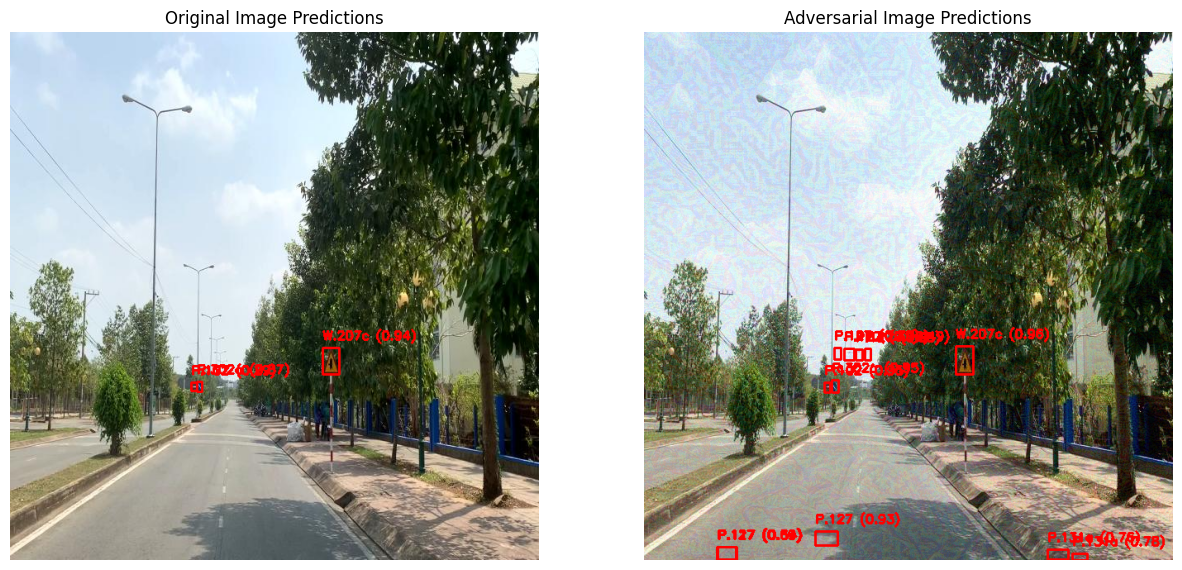

In [ ]:
# Visualize the prediction result
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/best.pt")

# Function to draw bounding boxes on an image
def draw_boxes(img, predictions, ax, title=""):
    img = img.detach().cpu().numpy()  # Convert tensor to numpy array
    img = np.transpose(img, (1, 2, 0))  # Change the order of dimensions
    img = np.clip(img, 0, 1) * 255  # Convert image back to pixel range [0, 255]
    img = img.astype(np.uint8)  # Convert to uint8 for cv2

    # Draw bounding boxes
    for pred in predictions:
        box = pred['box']  # Coordinates of the box (x1, y1, x2, y2)
        score = pred['score']  # Confidence score
        label = pred['label']  # Class label

        # Draw the bounding box
        img = cv2.rectangle(img, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (255, 0, 0), 2)

        # Put label and score text
        text = f'{label} ({score:.2f})'
        img = cv2.putText(img, text, (int(box[0]), int(box[1])-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')

# Get predictions for the original image
original_preds = model(im)
# Extract useful prediction data (bounding boxes, scores, and labels)
original_results = [{'box': pred[:4], 'score': pred[4], 'label': model.names[int(pred[5])]} for pred in original_preds[0].boxes.data]

# Get predictions for the adversarial image
adversarial_preds = model(per_im)
# Extract useful prediction data (bounding boxes, scores, and labels)
adversarial_results = [{'box': pred[:4], 'score': pred[4], 'label': model.names[int(pred[5])]} for pred in adversarial_preds[0].boxes.data]

# Plot images and results
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Visualize the original image with predictions
draw_boxes(im.squeeze(), original_results, axs[0], title="Original Image Predictions")

# Visualize the adversarial image with predictions
draw_boxes(per_im.squeeze(), adversarial_results, axs[1], title="Adversarial Image Predictions")

print(original_results)
print(adversarial_results)

plt.show()

# 6. Adversarial attack evaluation


In [ ]:
import os

def traverse_folder(folder_path):
    files_list = []
    i = 0
    for root, dirs, files in os.walk(folder_path):
      for file in files:
        files_list.append(file)

    return files_list
import os

pgd_path = '/content/drive/MyDrive/YOLOv9-AdversarialAttack/YOLOv8/results/PGD'
fgsm_path = '/content/drive/MyDrive/YOLOv9-AdversarialAttack/YOLOv8/results/FGSM'

fgsm_files = traverse_folder(os.path.join(fgsm_path, f'epsilon-{str(0.05)}'))
pgd_files = traverse_folder(os.path.join(pgd_path, f'epsilon-{str(0.05)}'))

test_images = '/content/datasets/test/images'
test_labels = '/content/datasets/test/labels'

test_files = traverse_folder(test_images)
labels_file = traverse_folder(test_labels)

for img in test_files:
  if img not in fgsm_files and img not in pgd_files:
    os.remove(os.path.join(test_images, img))

for label in labels_file:
  l = label[:-3] + 'jpg'
  if l not in fgsm_files and l not in pgd_files:
    os.remove(os.path.join(test_labels, label))

after_imgs = traverse_folder(test_images)
after_labels = traverse_folder(test_labels)

print(len(after_imgs))
print(len(after_labels))

0
0


In [ ]:
# Evaluation on the subset of test dataset

# Evaluation of YOLOv8m
from ultralytics import YOLO
# Load the model
model = YOLO("/content/best-2.pt")

print('---------------Original Images---------------')
results = model.val(data="/content/datasets/data.yaml", split="test")
print('---------------------------------------------')



---------------Original Images---------------
Ultralytics YOLOv8.2.93 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,873,342 parameters, 0 gradients, 78.9 GFLOPs


val: Scanning /content/datasets/test/labels... 202 images, 0 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<00:00, 1208.93it/s]

val: New cache created: /content/datasets/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.06it/s]


                   all        202        424      0.882      0.892       0.92      0.791
                DP.135          1          1      0.731          1      0.995      0.895
                 P.102         38         39      0.968      0.744      0.862      0.686
                P.103a          7          7      0.932      0.857       0.91      0.778
                P.103c          3          4      0.898          1      0.995      0.912
                 P.104          5          5      0.771        0.8      0.847      0.727
                P.106a          8          8          1      0.845       0.93      0.867
                P.106b          2          2      0.826          1      0.995      0.954
                 P.112          5          5      0.916          1      0.995      0.959
                 P.115          4          4      0.896          1      0.995      0.907
                 P.117          3          3      0.866          1      0.995      0.932
                P.123

In [ ]:
# We store the adversarial images in our drive, so first, we will load it into the current session
import shutil

shutil.copytree('/content/drive/MyDrive/YOLOv9-AdversarialAttack/YOLOv8/results', '/content/attackImages')

'/content/results'

In [ ]:
#preparing evaluation folder
import os

dataset_path = '/content/datasets/test'

def exchange_test_file(from_folder, to_path):
  temp = from_folder + '_temp'
  os.rename(from_folder, temp)
  os.rename(to_path, from_folder)
  os.rename(temp, to_path)


In [ ]:
# Evaluation on FGSM
from ultralytics import YOLO

model = YOLO("/content/best-2.pt")
dataset_path = '/content/datasets/test/images'
attackImages_path = '/content/attackImages'

print('------------------FGSM-0.05------------------')
exchange_test_file(f'{attackImages_path}/FGSM/epsilon-0.05', dataset_path)
results = model.val(data="/content/datasets/data.yaml", split="test")
exchange_test_file(dataset_path, f'{attackImages_path}/FGSM/epsilon-0.05')

print('---------------------------------------------')


print('------------------FGSM-0.1------------------')
exchange_test_file(f'{attackImages_path}/FGSM/epsilon-0.1', dataset_path)
results = model.val(data="/content/datasets/data.yaml", split="test")
exchange_test_file(dataset_path, f'{attackImages_path}/FGSM/epsilon-0.1')
print('---------------------------------------------')


print('------------------FGSM-0.3------------------')
exchange_test_file(f'{attackImages_path}/FGSM/epsilon-0.3', dataset_path)
results = model.val(data="/content/datasets/data.yaml", split="test")
exchange_test_file(dataset_path, f'{attackImages_path}/FGSM/epsilon-0.3')
print('---------------------------------------------')


------------------FGSM-0.05------------------
Ultralytics YOLOv8.2.93 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,873,342 parameters, 0 gradients, 78.9 GFLOPs


val: Scanning /content/datasets/test/labels... 202 images, 0 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<00:00, 1189.52it/s]

val: New cache created: /content/datasets/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]


                   all        202        424      0.863      0.754      0.856      0.706
                DP.135          1          1      0.765          1      0.995      0.895
                 P.102         38         39       0.96      0.615      0.773      0.617
                P.103a          7          7      0.954      0.857      0.868      0.642
                P.103c          3          4       0.92          1      0.995      0.829
                 P.104          5          5          1      0.428      0.928      0.663
                P.106a          8          8          1      0.567      0.882      0.776
                P.106b          2          2      0.802          1      0.995      0.995
                 P.112          5          5      0.966          1      0.995      0.934
                 P.115          4          4          1      0.713      0.995      0.895
                 P.117          3          3      0.875      0.667      0.863      0.685
                P.123

val: Scanning /content/datasets/test/labels... 202 images, 0 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<00:00, 1288.37it/s]

val: New cache created: /content/datasets/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.16it/s]


                   all        202        424      0.652      0.508      0.563      0.435
                DP.135          1          1      0.175          1      0.995      0.895
                 P.102         38         39      0.922      0.333      0.607      0.486
                P.103a          7          7      0.523      0.857      0.841      0.625
                P.103c          3          4      0.454        0.5      0.488      0.438
                 P.104          5          5          1          0       0.35      0.315
                P.106a          8          8          1       0.24      0.401      0.342
                P.106b          2          2      0.383          1      0.828      0.763
                 P.112          5          5      0.625        0.6      0.839      0.767
                 P.115          4          4      0.645      0.468      0.514      0.411
                 P.117          3          3      0.679      0.667      0.668      0.452
                P.123

val: Scanning /content/datasets/test/labels... 202 images, 0 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<00:00, 1221.79it/s]

val: New cache created: /content/datasets/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]


                   all        202        424      0.459    0.00354    0.00178   0.000981
                DP.135          1          1          1          0          0          0
                 P.102         38         39          0          0          0          0
                P.103a          7          7          1          0          0          0
                P.103c          3          4          0          0          0          0
                 P.104          5          5          0          0          0          0
                P.106a          8          8          1          0          0          0
                P.106b          2          2          1          0          0          0
                 P.112          5          5          1          0          0          0
                 P.115          4          4          0          0          0          0
                 P.117          3          3          1          0          0          0
                P.123

In [ ]:
# Evaluation on PGD

attackImages_path = '/content/attackImages'

print('------------------PGD-0.05-------------------')
exchange_test_file(f'{attackImages_path}/PGD/epsilon-0.05', dataset_path)
results = model.val(data="/content/datasets/data.yaml", split="test")
exchange_test_file(dataset_path, f'{attackImages_path}/PGD/epsilon-0.05')
print('---------------------------------------------')


print('------------------PGD-0.1-------------------')
exchange_test_file(f'{attackImages_path}/PGD/epsilon-0.1', dataset_path)
results = model.val(data="/content/datasets/data.yaml", split="test")
exchange_test_file(dataset_path, f'{attackImages_path}/PGD/epsilon-0.1')
print('---------------------------------------------')


print('------------------PGD-0.3-------------------')
exchange_test_file(f'{attackImages_path}/PGD/epsilon-0.3', dataset_path)
results = model.val(data="/content/datasets/data.yaml", split="test")
exchange_test_file(dataset_path, f'{attackImages_path}/PGD/epsilon-0.3')
print('---------------------------------------------')


------------------PGD-0.05-------------------
Ultralytics YOLOv8.2.93 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/datasets/test/labels... 202 images, 0 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<00:00, 1202.34it/s]

val: New cache created: /content/datasets/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.06it/s]


                   all        202        424      0.874      0.773      0.848      0.701
                DP.135          1          1      0.735          1      0.995      0.995
                 P.102         38         39      0.929      0.667      0.789       0.64
                P.103a          7          7      0.868      0.857      0.868      0.659
                P.103c          3          4       0.65          1      0.995       0.86
                 P.104          5          5      0.974        0.6      0.727      0.567
                P.106a          8          8          1      0.654      0.832      0.726
                P.106b          2          2      0.886          1      0.995      0.946
                 P.112          5          5      0.763        0.8      0.827      0.757
                 P.115          4          4      0.995          1      0.995      0.911
                 P.117          3          3      0.881          1      0.995      0.863
                P.123

val: Scanning /content/datasets/test/labels... 202 images, 0 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<00:00, 1204.80it/s]

val: New cache created: /content/datasets/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.29it/s]


                   all        202        424      0.711       0.45        0.5        0.4
                DP.135          1          1     0.0901          1      0.497      0.448
                 P.102         38         39          1      0.478      0.598      0.493
                P.103a          7          7      0.327      0.857      0.787      0.528
                P.103c          3          4      0.315          1       0.62       0.47
                 P.104          5          5          1          0          0          0
                P.106a          8          8          1      0.264      0.393       0.34
                P.106b          2          2      0.499        0.5      0.414      0.398
                 P.112          5          5      0.587        0.2      0.636      0.561
                 P.115          4          4          1          0      0.675      0.607
                 P.117          3          3      0.327      0.667      0.445      0.368
                P.123

val: Scanning /content/datasets/test/labels... 202 images, 0 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<00:00, 1167.11it/s]

val: New cache created: /content/datasets/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [01:31<00:00,  7.07s/it]


                   all        202        424     0.0966     0.0206    0.00231    0.00178
                DP.135          1          1          1          0          0          0
                 P.102         38         39          0          0          0          0
                P.103a          7          7          0          0          0          0
                P.103c          3          4          0          0          0          0
                 P.104          5          5          0          0          0          0
                P.106a          8          8          0          0          0          0
                P.106b          2          2          0          0          0          0
                 P.112          5          5          0          0          0          0
                 P.115          4          4          0          0          0          0
                 P.117          3          3          0          0          0          0
                P.123

# 7. Robusting: Adversarial Training
In this section, we use pgd to create the adversarial samples and then mix it with the training datatset. We prepare the new training dataset with ratio of 1:5 (adversarial images : clean images). Therefore, we randomly take out 450 images from the training dataset and generate adversarial version for it using PGD attack with epsilon = 0.1, alpha = 0.1, and iteration = 10.

In [ ]:
import torch

def fgsm(image, epsilon, gradient):
    sign_data_grad = gradient.sign()
    perturbed_image = image + epsilon * sign_data_grad
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    return perturbed_image


In [ ]:
import shutil

# Define your paths

custom_images_path = '/content/custom/images'
custom_labels_path = '/content/custom/labels'

# input: (path of image, path of label)
def move_image_label(image_name, label_name):
    # Get corresponding label name (assuming they share the same name but different extensions)
    # label_name = os.path.splitext(image_name)[0] + '.txt'
    # print(label_name)

    # Move image
    # dataset_image = os.path.join(dataset_images_path, image_name)
    custom_image = os.path.join(custom_images_path, image_name.split('/')[-1])
    shutil.move(image_name, custom_image)

    # Move label
    # dataset_label = os.path.join(dataset_labels_path, label_name)
    custom_label = os.path.join(custom_labels_path, label_name.split('/')[-1])
    shutil.move(label_name, custom_label)

    # Return directory contents after moving
    custom_images = os.listdir(custom_images_path)
    custom_labels = os.listdir(custom_labels_path)

    return custom_images, custom_labels

# move_image_label('/content/datasets/test/images/IMG_4004-MOV_out0025_png.rf.0588fd977adbf6bb719c3ffd10b5e09d.jpg', '/content/datasets/test/labels/IMG_4004-MOV_out0025_png.rf.0588fd977adbf6bb719c3ffd10b5e09d.txt')

In [ ]:
#Files operation
def list_files_in_directory(directory):
    files = []
    for root, dirs, filenames in os.walk(directory):
        for filename in filenames:
            files.append(os.path.join(root, filename))
    return files


In [ ]:
# Attack
import os

def FGSM_Attack(image_dir = '/content/custom/images', label_dir = '/content/custom/labels', epsilon=0.1):
  # print("IMG DIR: ", image_dir)
  # print("LABEL DIR: ", label_dir)
  # print("EPS: ", epsilon)
  gradient = ComputeGradient(image_dir, label_dir)
  if gradient is None:
    return None
  jpg_dirs = set()

  # Traverse the folder
  for root, dirs, files in os.walk(image_dir):
      for file in files:
        if file.endswith('.jpg'):
          full_path = os.path.join(root, file)
          jpg_dirs.add(full_path)

  image = load_image(list(jpg_dirs)[0])
  perturbed_image = fgsm(image, epsilon, gradient)
  return image, perturbed_image

In [ ]:
from torchvision.utils import save_image
# Define the PGD attack
def pgd_attack(image_dir = '/content/custom/images', label_dir = '/content/custom/labels', epsilon = 0.1, alpha = 0.01, num_iter = 10):
    split_image = []
    split_image = list_files_in_directory(image_dir)
    filename = split_image[0].split('/')[-1]
    temp_dir = '/content/temp'

    if not os.path.exists(temp_dir):
      os.makedirs(temp_dir)

    # Load initial image and calculate gradient
    temp = FGSM_Attack(image_dir, label_dir, epsilon)
    if temp is not None:

      image, per_image = FGSM_Attack(image_dir, label_dir, epsilon)
      save_image(per_image, temp_dir + '/' + filename)
      for _ in range(num_iter):
          # Compute the gradient based on the perturbed image
          gradient = ComputeGradient(temp_dir, label_dir)
          # print("GRADIENT: ", gradient)

          # Perform FGSM update on the perturbed image
          per_image = fgsm(per_image, alpha, gradient)

          # Project back to the epsilon-ball to ensure perturbation is within bounds
          delta = torch.clamp(per_image - image, min=-epsilon, max=epsilon)
          per_image = torch.clamp(image + delta, 0, 1).requires_grad_(True)

          # Remove the current image in the custom folder
          for existing_file in os.listdir(temp_dir):
              existing_file_path = os.path.join(temp_dir, existing_file)
              if os.path.isfile(existing_file_path):
                  os.remove(existing_file_path)
                  save_image(per_image, temp_dir + '/' + filename)

      for existing_file in os.listdir(temp_dir):
              existing_file_path = os.path.join(temp_dir, existing_file)
              if os.path.isfile(existing_file_path):
                  os.remove(existing_file_path)
      return image, per_image
    else:
      return None
# image_dir = '/content/custom/images'
# label_dir = '/content/custom/labels'

# im, per_im = pgd_attack(image_dir, label_dir, epsilon=0.05, alpha=0.01, num_iter=10)
# print("PERTUBE: ", per_im)

In [ ]:
# Attack on folder images
import shutil
import torch
from torchvision import transforms
from PIL import Image
import os
from torchvision.utils import save_image
import time

alpha = 0.1
iter = 10

def AttackOnFilePGDTraining(image_folder='/content/datasets/test/images', label_folder='/content/datasets/test/labels', custom_folder = '/content/custom', result_folder = '/content/result', epsilon=0.1, start = 0, to = 456):
    images = []
    labels = []

    print("IMG DIR TEST: ", image_folder)
    print("LABEL DIR TEST: ", label_folder)
    images = list_files_in_directory(image_folder)
    labels = list_files_in_directory(label_folder)

    print(f'images: {len(images)}')
    print(f'images: {len(labels)}')

    images.sort()
    labels.sort()

    images = images[start:to]
    labels = labels[start:to]

    # Used for test only. Remove it after test is done
    # images = images[]
    # labels = labels[:1]

    # temp_folder = '/content/temp'
    # if not os.path.exists(temp_folder):
    #   os.makedirs(temp_folder)

    if not os.path.exists(custom_folder):
        os.makedirs(custom_folder)
        os.makedirs(custom_folder + '/images')
        os.makedirs(custom_folder + '/labels')

    if not os.path.exists(result_folder):
        os.makedirs(result_folder)

    i = 0;
    start_time = time.time()
    while (i < len(images)):

        print("Image ", i, "/", len(images))
        split_image = images[i].split('/')[-1]
        split_label = labels[i].split('/')[-1]

        print("SPLIT_IMAGE: ", split_image[:-4])
        print("SPLIT_LABEL: ", split_image[:-4])
        print("IS EQUAL: ", split_image[:-4] != split_label[:-4])

        # check if the label file and image file are the same
        if (split_image[:-4] != split_label[:-4]):
            raise ValueError("This is an error message.")
            i = i+1

        image_custom = custom_folder + '/images'
        # removing the current file in custom/images folder
        for existing_file in os.listdir(image_custom):
            existing_file_path = os.path.join(image_custom, existing_file)
            if os.path.isfile(existing_file_path):
                os.remove(existing_file_path)

        label_custom = custom_folder + '/labels'
        for existing_file in os.listdir(label_custom):
            existing_file_path = os.path.join(label_custom, existing_file)
            if os.path.isfile(existing_file_path):
                os.remove(existing_file_path)

        shutil.copy(images[i], image_custom)
        shutil.copy(labels[i], label_custom)

        eps = epsilon

        temp = pgd_attack(image_custom, label_custom, eps, alpha, iter)
        if temp is None:
            i = i+1
            continue
        original_image, pertubed_image = temp
        #print(pertubed_image)

        #Transform image from tensor to jpg
        # to_pil = transforms.ToPILImage()
        # image_pil = to_pil(pertubed_image)

        # image_pil.save(os.path.join(result_folder, split_image))

        save_image(pertubed_image, result_folder + '/' + split_image)
        i = i+1
    end_time = time.time()
    hours, remainder = divmod(end_time, 3600)
    minutes, seconds = divmod(remainder, 60)

    print(f"Total time taken: {int(hours)} hours, {int(minutes)} minutes, {seconds:.2f} seconds.")



In [ ]:
image_dir_train = '/content/drive/MyDrive/YOLOv8-temp/train/images'
label_dir_train = '/content/drive/MyDrive/YOLOv8-temp/train/labels'

AttackOnFilePGDTraining(image_folder=image_dir_train, label_folder=label_dir_train, start=0, to=452)

IMG DIR TEST:  /content/drive/MyDrive/YOLOv8-temp/train/images
LABEL DIR TEST:  /content/drive/MyDrive/YOLOv8-temp/train/labels
images: 456
images: 456
Image  0 / 114
SPLIT_IMAGE:  IMG_4004-MOV_out0009_png.rf.7aaaefea8bfb31d1f6821d5be7e272f7
SPLIT_LABEL:  IMG_4004-MOV_out0009_png.rf.7aaaefea8bfb31d1f6821d5be7e272f7
IS EQUAL:  False
Image  1 / 114
SPLIT_IMAGE:  IMG_4004-MOV_out0015_png.rf.4e5a003ef5f5b988c42a7dd720f74798
SPLIT_LABEL:  IMG_4004-MOV_out0015_png.rf.4e5a003ef5f5b988c42a7dd720f74798
IS EQUAL:  False
Image  2 / 114
SPLIT_IMAGE:  IMG_4004-MOV_out0024_png.rf.9db6a9d9f709a2db7d49a1d3acb294f1
SPLIT_LABEL:  IMG_4004-MOV_out0024_png.rf.9db6a9d9f709a2db7d49a1d3acb294f1
IS EQUAL:  False
Image  3 / 114
SPLIT_IMAGE:  IMG_4004-MOV_out0026_png.rf.911724435c4c7f593ec1582631db0b8b
SPLIT_LABEL:  IMG_4004-MOV_out0026_png.rf.911724435c4c7f593ec1582631db0b8b
IS EQUAL:  False
Image  4 / 114
SPLIT_IMAGE:  IMG_4004-MOV_out0034_png.rf.8f52f360926155653b8a585cb6f72ab1
SPLIT_LABEL:  IMG_4004-MOV_out

In [ ]:
import shutil
shutil.copytree('/content/result', '/content/drive/MyDrive/YOLOv8-temp/training-adv/0-114')

'/content/drive/MyDrive/YOLOv8-temp/training-adv/0-114'

In [ ]:
!zip -r result.zip /content/result

from google.colab import files
files.download('result.zip')


  adding: content/result/ (stored 0%)
  adding: content/result/IMG_4022-MOV_out0001_png.rf.88eed2764af55dbcd71e1260b7f94515.jpg (deflated 0%)
  adding: content/result/IMG_4028-MOV_out0007_png.rf.01cb8be0ae1a8bd272782c9b2cce73f5.jpg (deflated 0%)
  adding: content/result/IMG_4024-MOV_out0247_png.rf.5cc51ce7dcedc9c14ffe0390f7ec4846.jpg (deflated 0%)
  adding: content/result/IMG_4007-MOV_out0062_png.rf.f98373d91bca4772117038fc76cc7d1a.jpg (deflated 0%)
  adding: content/result/IMG_4014-MOV_out0024_png.rf.264680672ab8edbd308d29a3b1ff79ab.jpg (deflated 0%)
  adding: content/result/IMG_4025-MOV_out0006_png.rf.2e525c2fe89ea4f0411f3fefa40e149f.jpg (deflated 0%)
  adding: content/result/IMG_4004-MOV_out0026_png.rf.911724435c4c7f593ec1582631db0b8b.jpg (deflated 0%)
  adding: content/result/IMG_4033-MOV_out0019_png.rf.0400e30aaf6d2002a02bfe2cd5878408.jpg (deflated 0%)
  adding: content/result/IMG_4005-MOV_out0036_png.rf.99d1fbdad3b92b5070dc5f9f7fdc0e4f.jpg (deflated 0%)
  adding: content/result/I

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Augment the adversarial data with the original dataset
import shutil
import os

adversarial = list_files_in_directory('/content/drive/MyDrive/YOLOv9-AdversarialAttack/YOLOv8/adversarial_sample_traning')
label_dir = '/content/datasets/train/labels'


if not os.path.exists('/content/train-adv') :
    os.mkdir('/content/train-adv')
    os.mkdir('/content/train-adv/images')
    os.mkdir('/content/train-adv/labels')
i = 1
for f in adversarial:
  fileName = f.split('/')[-1][:-4]
  shutil.copy(f, f'/content/train-adv/images/adv-{i}.jpg')
  shutil.copy(f'{label_dir}/{fileName}.txt', f'/content/train-adv/labels/adv-{i}.txt')
  i = i+1
  #print(fileName)

In [ ]:
#test
print(len(list_files_in_directory('/content/train-adv/images')))
print(len(list_files_in_directory('/content/train-adv/labels')))

452
452


In [ ]:
# bring adversarial images and labels to training dataset
import shutil

adversarial_images = list_files_in_directory('/content/train-adv/images')
adversarial_labels = list_files_in_directory('/content/train-adv/labels')

adversarial_images.sort()
adversarial_labels.sort()

for i in range(len(adversarial_images)):
  imageSplit = adversarial_images[i].split('/')[-1][:-4]
  labelSplit = adversarial_labels[i].split('/')[-1][:-4]

  if (imageSplit != labelSplit):
    raise ValueError("image split should be qual label Split")

  shutil.copy(adversarial_images[i], '/content/datasets/train/images')
  shutil.copy(adversarial_labels[i], '/content/datasets/train/labels')

In [ ]:
#test
print(len(list_files_in_directory('/content/datasets/train/images')))
print(len(list_files_in_directory('/content/datasets/train/labels')))

2732
2732


In [ ]:
# Retrain the model
# training medium version of YOLOv8

from ultralytics.models.yolo.detect.train import DetectionTrainer
from ultralytics import YOLO

args = dict(model="/content/best-2.pt", data="/content/datasets/data.yaml", epochs=100, batch=33)
trainer = DetectionTrainer(overrides=args)
trainer.train()

Ultralytics YOLOv8.2.95 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/best-2.pt, data=/content/datasets/data.yaml, epochs=100, time=None, patience=100, batch=33, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

train: Scanning /content/datasets/train/labels.cache... 2732 images, 465 backgrounds, 0 corrupt: 100%|██████████| 2732/2732 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/datasets/valid/labels.cache... 786 images, 169 backgrounds, 0 corrupt: 100%|██████████| 786/786 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000161, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.000515625), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      15.6G     0.4355     0.2846     0.8602         63        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:11<00:00,  1.01it/s]

                   all        786       1251      0.817      0.871      0.893       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      14.4G     0.4689     0.3225     0.8653         71        640: 100%|██████████| 83/83 [01:30<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.806      0.842      0.877      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      14.4G     0.4897     0.3452     0.8745         69        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.841      0.824      0.881      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      14.4G     0.5144     0.3861     0.8843         80        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        786       1251      0.794       0.84      0.874      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      14.4G     0.5169     0.3885     0.8812         85        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251       0.84      0.805      0.876      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      14.3G     0.5143     0.3955     0.8871         66        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all        786       1251      0.754       0.86      0.863      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      14.4G     0.5183     0.3872     0.8885         49        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.821       0.83      0.869      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      14.4G     0.5215     0.3869     0.8824         68        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        786       1251      0.767      0.839      0.875      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      14.4G     0.5192     0.3812      0.884         61        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        786       1251      0.864      0.796      0.878      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      14.4G      0.508     0.3779     0.8854         62        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.803      0.863      0.884      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      14.4G     0.5063     0.3721     0.8802         54        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.825       0.83      0.882      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      14.3G     0.4943     0.3732     0.8867         64        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.821      0.839      0.883      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      14.4G     0.5163     0.3738     0.8867         64        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        786       1251      0.821      0.843      0.883      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      14.4G     0.5061     0.3536      0.885         62        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251       0.82      0.833      0.875      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      14.5G     0.4993     0.3692     0.8773         59        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        786       1251      0.869      0.822        0.9      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      14.3G     0.5048     0.3595     0.8794         52        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.838      0.814      0.872      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      14.4G     0.4994     0.3514     0.8793         71        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        786       1251       0.81      0.857      0.885       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      14.3G     0.5008     0.3614      0.882         61        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.869      0.806      0.886      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      14.4G     0.4859     0.3412     0.8712         62        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.774      0.874      0.892      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      14.4G     0.4856     0.3433     0.8773         75        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.855       0.85      0.894      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      14.4G     0.4801     0.3323     0.8742         60        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.837      0.833       0.87       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      14.4G     0.4857     0.3311      0.869         73        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        786       1251      0.863      0.826      0.875      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      14.5G     0.4821     0.3321     0.8711         49        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.831      0.842      0.876      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      14.3G      0.487     0.3341      0.879         75        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.829      0.843      0.883      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      14.4G      0.471     0.3247      0.869         49        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        786       1251      0.845      0.819       0.88      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      14.3G     0.4771      0.326     0.8759         91        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.819      0.861      0.896      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      14.4G     0.4761     0.3188     0.8714         60        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.856      0.812      0.864       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      14.3G     0.4685     0.3225     0.8734         54        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.861        0.8      0.876      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      14.4G     0.4642     0.3198     0.8736         61        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.841      0.826      0.878      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      14.4G     0.4609     0.3168     0.8681         54        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all        786       1251      0.793      0.868      0.884      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      14.4G       0.47     0.3138     0.8691         44        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.846      0.834      0.872      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      14.3G     0.4642     0.3078     0.8652         68        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.862      0.809      0.871      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      14.4G     0.4619     0.3109     0.8699         73        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251       0.82      0.839      0.884      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      14.4G     0.4661     0.3167     0.8691         82        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.861      0.818      0.883       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      14.5G     0.4515     0.3091     0.8591         55        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.838      0.826      0.877      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      14.3G     0.4548     0.3098     0.8708         52        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.832      0.848      0.889      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      14.5G       0.45     0.3125     0.8657         68        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.859      0.813      0.882      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      14.4G     0.4479        0.3     0.8692         52        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.872      0.822      0.894       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      14.4G     0.4406     0.2959     0.8624         71        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.835      0.837      0.896      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      14.4G     0.4464     0.3023     0.8672         58        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.846      0.829      0.897       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      14.4G     0.4375      0.293     0.8561         49        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.842      0.838      0.883      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      14.3G      0.443     0.2902     0.8595         71        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251       0.86      0.821      0.899      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      14.4G     0.4425      0.295      0.862         56        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.844      0.838      0.898      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      14.3G     0.4362     0.2924     0.8604         60        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.855      0.824       0.88      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      14.4G     0.4338     0.2849     0.8597         86        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.854      0.828      0.892       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      14.3G     0.4299     0.2798     0.8587         56        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.855      0.826      0.869      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      14.4G     0.4242     0.2721     0.8529         68        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        786       1251      0.839      0.846      0.877      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      14.3G     0.4221     0.2726     0.8484         76        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        786       1251      0.821      0.858      0.888      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      14.4G     0.4193     0.2803     0.8495         48        640: 100%|██████████| 83/83 [01:30<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.10it/s]

                   all        786       1251      0.829      0.845      0.887      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      14.3G     0.4153     0.2704     0.8515         60        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.851      0.826      0.887      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      14.4G     0.4201     0.2806     0.8535         66        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        786       1251      0.862      0.816      0.883       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      14.3G     0.4178     0.2794     0.8576         47        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.828      0.845      0.882      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      14.4G     0.4028     0.2677     0.8486         58        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.10it/s]

                   all        786       1251      0.861      0.825       0.87      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      14.3G     0.4117     0.2696     0.8525         62        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        786       1251      0.856      0.829      0.881      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      14.4G     0.4117     0.2616     0.8468         53        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        786       1251      0.855       0.82      0.888       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      14.3G      0.388     0.2607      0.842         67        640: 100%|██████████| 83/83 [01:30<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        786       1251      0.858      0.831      0.884      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      14.4G     0.3983     0.2591     0.8421         56        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        786       1251      0.788      0.877       0.89      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      14.4G     0.3964     0.2563     0.8472         77        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        786       1251      0.805      0.874      0.882      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      14.5G     0.3929     0.2599     0.8424         51        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        786       1251      0.792      0.878      0.878      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      14.3G     0.3969     0.2501     0.8423         65        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        786       1251      0.869      0.828      0.884      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      14.4G     0.4015     0.2579     0.8436         65        640: 100%|██████████| 83/83 [01:30<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        786       1251      0.843      0.849       0.88      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      14.4G     0.3915     0.2519     0.8437         64        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        786       1251      0.829      0.843      0.868      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      14.4G     0.3929     0.2526     0.8466         64        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.836      0.836      0.876      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      14.4G      0.387     0.2439     0.8454         82        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        786       1251      0.843      0.827      0.882      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      14.5G     0.3824     0.2494     0.8414         47        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.10it/s]

                   all        786       1251      0.844      0.837      0.884       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      14.3G     0.3773     0.2443     0.8426         59        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.852      0.832      0.898      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      14.4G     0.3868     0.2503      0.844         62        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.827      0.857      0.888      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      14.3G     0.3799     0.2428     0.8397         57        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.837      0.855        0.9      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      14.4G     0.3852      0.244     0.8392         39        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.846      0.838      0.883      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      14.3G      0.376     0.2397     0.8343         61        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.806      0.888      0.891      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      14.4G     0.3764     0.2387     0.8402         57        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.794      0.885      0.884       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      14.4G     0.3703     0.2378      0.837         62        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all        786       1251      0.849      0.834      0.883      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      14.4G     0.3706     0.2418     0.8386         75        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.848      0.828      0.892      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      14.3G     0.3676     0.2318     0.8329         74        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.848      0.838      0.881      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      14.5G     0.3722     0.2352     0.8358         71        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        786       1251      0.846       0.83      0.871      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      14.3G     0.3656     0.2319     0.8337         61        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251       0.86      0.824      0.884       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      14.4G     0.3622     0.2312     0.8298         67        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.832      0.846      0.879       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      14.3G     0.3606     0.2261     0.8313         62        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        786       1251      0.853      0.829      0.883      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      14.4G     0.3587     0.2273     0.8342         41        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        786       1251      0.856      0.827      0.882      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      14.4G     0.3551     0.2215     0.8298         59        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.862      0.825      0.881      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      14.5G      0.348     0.2189     0.8397         60        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        786       1251      0.852      0.824      0.885      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      14.3G      0.356     0.2238     0.8371         47        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.835      0.844      0.884       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      14.4G     0.3484     0.2193     0.8326         78        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        786       1251      0.795      0.878      0.884      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      14.3G     0.3475     0.2174     0.8287         77        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.785      0.882      0.882      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      14.4G     0.3498     0.2203     0.8321         65        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        786       1251      0.849      0.832      0.875      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      14.3G     0.3449     0.2149     0.8304         56        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all        786       1251      0.794      0.879      0.883      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      14.4G     0.3444     0.2144     0.8347         56        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        786       1251      0.802       0.88      0.884      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      14.4G     0.3424     0.2176     0.8302         52        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.791       0.88      0.882      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      14.5G     0.3334     0.2153     0.8325         77        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]

                   all        786       1251      0.791      0.882      0.887      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      14.3G     0.3398      0.214     0.8307         63        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.13it/s]

                   all        786       1251       0.79      0.884      0.885      0.751


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      14.4G     0.3294     0.1907     0.8142         39        640: 100%|██████████| 83/83 [01:30<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.845      0.834      0.881      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      14.3G     0.3196      0.184     0.8077         51        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.801      0.875      0.881      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      14.4G     0.3137     0.1848     0.8061         31        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.804      0.875      0.875       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      14.4G     0.3087     0.1789     0.8022         37        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.803       0.88      0.874       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      14.4G     0.3053     0.1755     0.7994         35        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.858      0.829      0.884      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      14.3G     0.3052     0.1745     0.8015         37        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.855      0.828      0.884      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      14.4G     0.3043      0.178     0.8026         38        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.795      0.873      0.884       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      14.3G     0.3045     0.1738     0.8022         41        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.802      0.875      0.886      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      14.4G     0.2979     0.1727     0.7954         38        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.798       0.87      0.883      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      14.3G     0.2982     0.1726     0.8035         40        640: 100%|██████████| 83/83 [01:29<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.12it/s]

                   all        786       1251      0.801      0.872      0.883       0.75



100 epochs completed in 2.827 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 52.1MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.95 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,873,342 parameters, 0 gradients, 78.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:10<00:00,  1.11it/s]


                   all        786       1251      0.837      0.855        0.9      0.758
                DP.135          4          4      0.907          1      0.995      0.907
                 P.102         48         50      0.954       0.83       0.91      0.774
                P.103a         10         10      0.871        0.9       0.92       0.76
                P.103b          1          1      0.432          1      0.995      0.995
                P.103c         15         18      0.744          1      0.984       0.89
                 P.104         10         10      0.891      0.818      0.916      0.797
                P.106a         19         19      0.812      0.947      0.957      0.862
                P.106b         15         23      0.914      0.913      0.982      0.831
                 P.112          4          4      0.915          1      0.995      0.928
                 P.115          3          3      0.916          1      0.995      0.895
                 P.11

In [ ]:
# Store the weights
import shutil

shutil.copy("/content/runs/detect/train3/weights/best.pt", "/content/drive/MyDrive/YOLOv9-AdversarialAttack/YOLOv8/adversarial-training-result")

'/content/drive/MyDrive/YOLOv9-AdversarialAttack/YOLOv8/adversarial-training-result/best.pt'

# 8. Robust model evaluation

In [11]:
import os

def traverse_folder(folder_path):
    files_list = []
    i = 0
    for root, dirs, files in os.walk(folder_path):
      for file in files:
        files_list.append(file)

    return files_list
import os

pgd_path = '/content/drive/MyDrive/YOLOv9-AdversarialAttack/YOLOv8/results/PGD'
fgsm_path = '/content/drive/MyDrive/YOLOv9-AdversarialAttack/YOLOv8/results/FGSM'

fgsm_files = traverse_folder(os.path.join(fgsm_path, f'epsilon-{str(0.05)}'))
pgd_files = traverse_folder(os.path.join(pgd_path, f'epsilon-{str(0.05)}'))

test_images = '/content/datasets/test/images'
test_labels = '/content/datasets/test/labels'

test_files = traverse_folder(test_images)
labels_file = traverse_folder(test_labels)

for img in test_files:
  if img not in fgsm_files and img not in pgd_files:
    os.remove(os.path.join(test_images, img))

for label in labels_file:
  l = label[:-3] + 'jpg'
  if l not in fgsm_files and l not in pgd_files:
    os.remove(os.path.join(test_labels, label))

after_imgs = traverse_folder(test_images)
after_labels = traverse_folder(test_labels)

print(len(after_imgs))
print(len(after_labels))

202
202


In [15]:
# Evaluation on the subset of test dataset

# Evaluation of YOLOv8m
from ultralytics import YOLO
# Load the model
model = YOLO("/content/best-3.pt")

print('---------------Original Images---------------')
results = model.val(data="/content/datasets/data.yaml", split="test")
print('---------------------------------------------')

---------------Original Images---------------
Ultralytics YOLOv8.2.95 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,873,342 parameters, 0 gradients, 78.9 GFLOPs


val: Scanning /content/datasets/test/labels.cache... 202 images, 0 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:08<00:00,  1.56it/s]


                   all        202        424      0.903      0.876      0.934      0.787
                DP.135          1          1      0.805          1      0.995      0.895
                 P.102         38         39          1      0.699      0.888      0.724
                P.103a          7          7      0.957      0.857      0.895      0.744
                P.103c          3          4      0.935          1      0.995      0.877
                 P.104          5          5      0.799        0.8      0.847      0.732
                P.106a          8          8          1      0.817      0.911      0.856
                P.106b          2          2      0.876          1      0.995      0.948
                 P.112          5          5      0.954          1      0.995      0.942
                 P.115          4          4      0.905          1      0.995      0.928
                 P.117          3          3      0.919          1      0.995      0.892
                P.123

In [20]:
# We store the adversarial images in our drive, so first, we will load it into the current session
import shutil
import os
if os.path.exists('/content/results'):
  os.remove('/content/results')

shutil.copytree('/content/drive/MyDrive/YOLOv9-AdversarialAttack/YOLOv8/results', '/content/attackImages')

'/content/attackImages'

In [21]:
#preparing evaluation folder
import os

dataset_path = '/content/datasets/test'

def exchange_test_file(from_folder, to_path):
  temp = from_folder + '_temp'
  os.rename(from_folder, temp)
  os.rename(to_path, from_folder)
  os.rename(temp, to_path)

In [22]:
# Evaluation on FGSM
from ultralytics import YOLO

model = YOLO("/content/best-3.pt")
dataset_path = '/content/datasets/test/images'
attackImages_path = '/content/attackImages'


print('------------------FGSM-0.05------------------')
exchange_test_file(f'{attackImages_path}/FGSM/epsilon-0.05', dataset_path)
results = model.val(data="/content/datasets/data.yaml", split="test")
exchange_test_file(dataset_path, f'{attackImages_path}/FGSM/epsilon-0.05')

print('---------------------------------------------')


print('------------------FGSM-0.1------------------')
exchange_test_file(f'{attackImages_path}/FGSM/epsilon-0.1', dataset_path)
results = model.val(data="/content/datasets/data.yaml", split="test")
exchange_test_file(dataset_path, f'{attackImages_path}/FGSM/epsilon-0.1')
print('---------------------------------------------')


print('------------------FGSM-0.3------------------')
exchange_test_file(f'{attackImages_path}/FGSM/epsilon-0.3', dataset_path)
results = model.val(data="/content/datasets/data.yaml", split="test")
exchange_test_file(dataset_path, f'{attackImages_path}/FGSM/epsilon-0.3')
print('---------------------------------------------')


------------------FGSM-0.05------------------
Ultralytics YOLOv8.2.95 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,873,342 parameters, 0 gradients, 78.9 GFLOPs


val: Scanning /content/datasets/test/labels... 202 images, 0 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<00:00, 1406.09it/s]

val: New cache created: /content/datasets/test/labels.cache



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.90it/s]


                   all        202        424      0.921      0.881      0.911      0.758
                DP.135          1          1      0.878          1      0.995      0.995
                 P.102         38         39      0.928      0.659      0.788      0.638
                P.103a          7          7      0.976      0.857      0.895      0.722
                P.103c          3          4      0.959          1      0.995      0.836
                 P.104          5          5      0.963        0.8      0.825      0.703
                P.106a          8          8          1      0.817      0.982      0.861
                P.106b          2          2      0.928          1      0.995      0.895
                 P.112          5          5      0.966          1      0.995      0.931
                 P.115          4          4      0.963          1      0.995      0.898
                 P.117          3          3       0.96          1      0.995      0.865
                P.123

val: Scanning /content/datasets/test/labels... 202 images, 0 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<00:00, 1281.93it/s]

val: New cache created: /content/datasets/test/labels.cache



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]


                   all        202        424      0.919      0.811      0.916      0.725
                DP.135          1          1      0.871          1      0.995      0.895
                 P.102         38         39      0.959      0.604      0.726      0.571
                P.103a          7          7      0.976      0.857      0.889      0.711
                P.103c          3          4      0.958          1      0.995      0.848
                 P.104          5          5      0.959        0.8      0.823      0.687
                P.106a          8          8          1      0.796      0.895      0.802
                P.106b          2          2      0.908          1      0.995      0.895
                 P.112          5          5      0.965          1      0.995      0.903
                 P.115          4          4      0.953          1      0.995      0.889
                 P.117          3          3      0.952          1      0.995      0.899
                P.123

val: Scanning /content/datasets/test/labels... 202 images, 0 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<00:00, 1311.97it/s]

val: New cache created: /content/datasets/test/labels.cache



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.07it/s]


                   all        202        424      0.661      0.104      0.138       0.11
                DP.135          1          1          1          0          0          0
                 P.102         38         39      0.755      0.154      0.236       0.19
                P.103a          7          7      0.517      0.286      0.315       0.25
                P.103c          3          4          0          0          0          0
                 P.104          5          5          1          0          0          0
                P.106a          8          8          1          0     0.0362     0.0289
                P.106b          2          2      0.273        0.5      0.695      0.606
                 P.112          5          5          1          0      0.395      0.329
                 P.115          4          4          1          0     0.0785     0.0628
                 P.117          3          3          1          0     0.0446     0.0446
                P.123

In [23]:
# Evaluation on PGD

print('------------------PGD-0.05-------------------')
exchange_test_file(f'{attackImages_path}/PGD/epsilon-0.05', dataset_path)
results = model.val(data="/content/datasets/data.yaml", split="test")
exchange_test_file(dataset_path, f'{attackImages_path}/PGD/epsilon-0.05')
print('---------------------------------------------')


print('------------------PGD-0.1-------------------')
exchange_test_file(f'{attackImages_path}/PGD/epsilon-0.1', dataset_path)
results = model.val(data="/content/datasets/data.yaml", split="test")
exchange_test_file(dataset_path, f'{attackImages_path}/PGD/epsilon-0.1')
print('---------------------------------------------')


print('------------------PGD-0.3-------------------')
exchange_test_file(f'{attackImages_path}/PGD/epsilon-0.3', dataset_path)
results = model.val(data="/content/datasets/data.yaml", split="test")
exchange_test_file(dataset_path, f'{attackImages_path}/PGD/epsilon-0.3')
print('---------------------------------------------')


------------------PGD-0.05-------------------
Ultralytics YOLOv8.2.95 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/datasets/test/labels... 202 images, 0 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<00:00, 1412.92it/s]

val: New cache created: /content/datasets/test/labels.cache



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.00it/s]


                   all        202        424      0.906      0.865      0.915      0.766
                DP.135          1          1      0.846          1      0.995      0.895
                 P.102         38         39      0.966      0.723      0.846      0.663
                P.103a          7          7      0.992      0.857      0.895      0.722
                P.103c          3          4      0.944          1      0.995      0.861
                 P.104          5          5      0.796        0.8      0.833      0.717
                P.106a          8          8          1      0.812      0.995      0.828
                P.106b          2          2        0.9          1      0.995      0.895
                 P.112          5          5          1      0.967      0.995      0.922
                 P.115          4          4      0.939          1      0.995      0.925
                 P.117          3          3       0.94          1      0.995      0.914
                P.123

val: Scanning /content/datasets/test/labels... 202 images, 0 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<00:00, 1286.51it/s]

val: New cache created: /content/datasets/test/labels.cache



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]


                   all        202        424      0.904      0.811      0.857      0.709
                DP.135          1          1      0.711          1      0.995      0.895
                 P.102         38         39          1       0.68       0.77      0.625
                P.103a          7          7      0.978      0.857      0.881      0.667
                P.103c          3          4      0.967          1      0.995      0.859
                 P.104          5          5      0.973        0.8      0.821      0.726
                P.106a          8          8          1      0.649      0.801      0.729
                P.106b          2          2      0.644          1      0.995      0.895
                 P.112          5          5      0.971          1      0.995      0.919
                 P.115          4          4       0.97          1      0.995      0.894
                 P.117          3          3      0.975          1      0.995      0.881
                P.123

val: Scanning /content/datasets/test/labels... 202 images, 0 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<00:00, 1461.31it/s]

val: New cache created: /content/datasets/test/labels.cache



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.18it/s]


                   all        202        424      0.719      0.178       0.24      0.195
                DP.135          1          1          1          0          0          0
                 P.102         38         39          1     0.0978      0.128      0.111
                P.103a          7          7      0.603      0.286      0.379      0.322
                P.103c          3          4      0.278       0.25      0.345       0.33
                 P.104          5          5          1          0          0          0
                P.106a          8          8          1          0      0.131      0.118
                P.106b          2          2      0.237          1      0.828      0.795
                 P.112          5          5          1          0      0.314       0.28
                 P.115          4          4          1          0      0.102     0.0814
                 P.117          3          3          0          0    0.00046   0.000184
                P.123

# Conclusion
This is the end of our project. As a conclusion, we can see both FGSM and PGD posed a significant risk to YOLOv8. However, after re-trained by mixing the clean data with adversarial images, we can see that it can be improved relatively.

For future work, we suggest to further analyze the model using patch attack. Moreover, White-box attack with subsitute model (especially other member of YOLO family) can be a risk. Besides, we leave the evaluation on Black-box attack for the future work.